In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, dtype=object)
study_results = pd.read_csv(study_results_path, dtype=object)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# len(combined_df['Mouse ID'])
len(mouse_metadata['Mouse ID'])

249

In [3]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate['Mouse ID'].unique

<bound method Series.unique of 107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45,0,Propriva,Female,21,26
137,g989,0,45,0,Propriva,Female,21,26
329,g989,5,48.78680146,0,Propriva,Female,21,26
360,g989,5,47.57039208,0,Propriva,Female,21,26
620,g989,10,51.74515613,0,Propriva,Female,21,26


In [5]:
clean_df = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
clean_df

# Checking the number of mice in the clean DataFrame.
len(clean_df)
clean_df.count()

Mouse ID        248
Drug Regimen    248
Sex             248
Age_months      248
Weight (g)      248
dtype: int64

In [6]:
new_combined = pd.merge(study_results, clean_df, on= 'Mouse ID', how= 'left')
new_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25


In [7]:
# Convert columns to float
cols = ['Timepoint','Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)']
# new_combined['Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)'] = new_combined['Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)'].astype(int)
new_combined[cols] = new_combined[cols].astype(float)

In [11]:
# Group by drug regimen
grouped_df = new_combined.groupby('Drug Regimen')


In [12]:
# Calculate  tumor volume mean
vol_mean = grouped_df['Tumor Volume (mm3)'].mean()

# Calculate tumor volume median
vol_median = grouped_df['Tumor Volume (mm3)'].median()

# Calculate tumor volume variance
vol_var = grouped_df['Tumor Volume (mm3)'].var()

# Calculate tumor volume standard deviation
vol_std = grouped_df['Tumor Volume (mm3)'].std()

# Calculate tumor volume SEM
vol_sem = grouped_df['Tumor Volume (mm3)'].sem()


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = {
    'Mean Tumor Volume': vol_mean,
    'Median Tumor Volume': vol_median, 
    'Tumor Volume Variance': vol_var, 
    'Tumor Volume Std. Dev.': vol_std,
    'Tumor Volume Std. Err.': vol_sem
}

pd.DataFrame(summary)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_2 = grouped_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


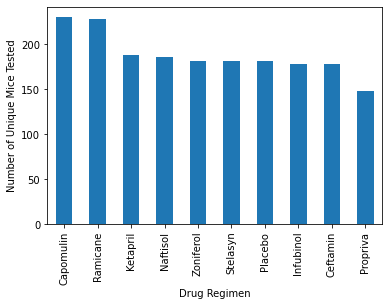

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count = new_combined.groupby(["Drug Regimen"], sort=True).count()["Mouse ID"]

unique_mice = mouse_count.sort_values(ascending = False).plot(kind = "bar")
unique_mice.set_xlabel("Drug Regimen")
unique_mice.set_ylabel("Number of Unique Mice Tested")
plt.show()

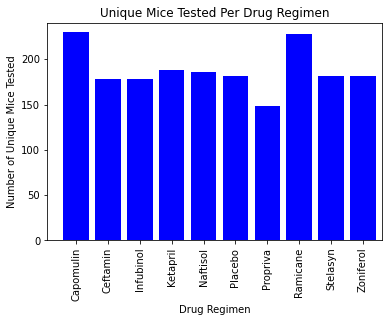

In [17]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
plt.figure()
x_axis = np.arange(0, len(mouse_count))
tick_locations = [value+0.4 for value in x_axis]
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
mice = [230,178,178,188,186,181,148,228,181,182] 
plt.bar(drugs, mice, color= 'b', align='edge')
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(mouse_count)+10)
plt.title("Unique Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

In [19]:
# Create a df with just Mouse ID and sex
distribution = clean_df[['Mouse ID', 'Sex']]

# Calculate total of each
new = distribution.groupby('Sex')
total = new['Sex'].count()

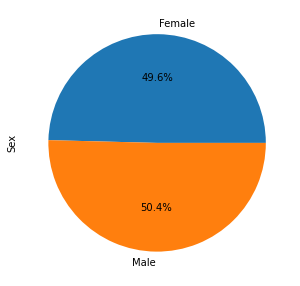

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = total.plot.pie(y='Sex', figsize=(5, 5), autopct='%1.1f%%')

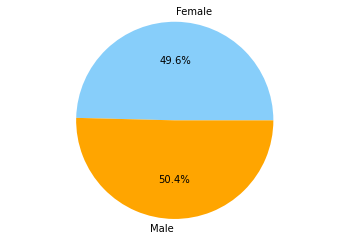

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [123, 125]
colors = ['lightskyblue', 'orange']
plt.pie(sizes, labels= labels, colors= colors, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tp = pd.DataFrame(new_combined.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})


# Merge max timepoint onto data_df
merged_df = pd.merge(new_combined, max_tp, on='Mouse ID')
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0.0,45.000000,0.0,Capomulin,Female,9.0,22.0,45.0
1,b128,5.0,45.651331,0.0,Capomulin,Female,9.0,22.0,45.0
2,b128,10.0,43.270852,0.0,Capomulin,Female,9.0,22.0,45.0
3,b128,15.0,43.784893,0.0,Capomulin,Female,9.0,22.0,45.0
4,b128,20.0,42.731552,0.0,Capomulin,Female,9.0,22.0,45.0


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for trt in treatments: 
    
    # Locate rows where drug regimen is equal to treatments 
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == trt]
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    total_vol = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    # Add values to tumor volume list (to be used for plotting)
    values = total_vol['Tumor Volume (mm3)']
    tumor_vol.append(values)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = total_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    outliers = [lower_bound, upper_bound]

    # Print potential outliers
    print(f"{trt}'s potential outliers: {outliers}")

Capomulin's potential outliers: [20.70456164999999, 51.83201549]
Ramicane's potential outliers: [17.912664470000003, 54.30681135]
Infubinol's potential outliers: [36.83290494999999, 82.74144559000001]
Ceftamin's potential outliers: [25.355449580000002, 87.66645829999999]


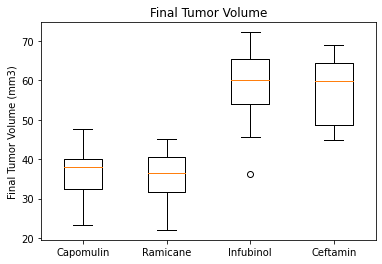

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels= treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume')
plt.show()

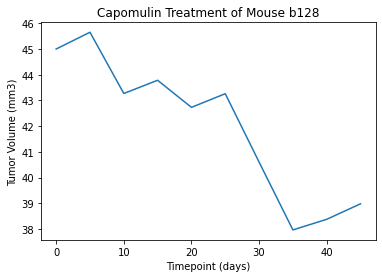

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# id mouse treated with Capomulin
mouse_id = new_combined.loc[new_combined['Mouse ID'] == 'b128']
mouse_id

plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()


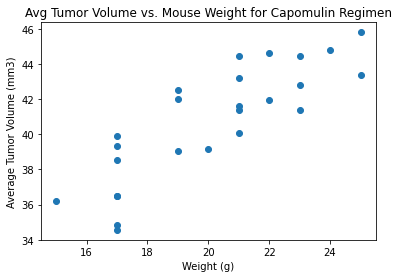

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a Capomulin df
capomulin = new_combined.loc[new_combined['Drug Regimen'] == 'Capomulin']
capomulin_df = pd.DataFrame(capomulin)

# Create df to extract avergae of weight and tumor volume 
get_avg = capomulin_df.groupby('Mouse ID').mean()
get_avg

# Plot scatter and label
plt.scatter(get_avg['Weight (g)'],get_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)") 
plt.title("Avg Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


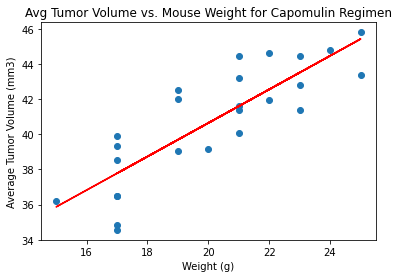

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(get_avg['Weight (g)'],get_avg['Tumor Volume (mm3)'])[0],2)

# Regression
slope, intercept, r, p, std_err = st.linregress(get_avg['Weight (g)'],get_avg['Tumor Volume (mm3)'])

# Calculate regression equation 
y = slope * get_avg['Weight (g)'] + intercept

# Plot the scatter
plt.scatter(get_avg['Weight (g)'],get_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)") 
plt.title("Avg Tumor Volume vs. Mouse Weight for Capomulin Regimen")

# Add regression line
plt.plot(get_avg['Weight (g)'], y, "r-")
print(f'The correlation between mouse weight and the average tumor volume is {corr_coef}')